### Import the Basic packages ###

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

import warnings 
warnings.filterwarnings( action = "ignore")

In [3]:
# Load data 
df = pd.read_csv(r"mall_feedback.csv")

In [4]:
# View the data
df[:5]

,Name,Gender,Age,Email,Feedback,Sentiment,Rating
0,Karan2497,Male,22,karan2497@example.com,Product quality is not satisfactory.,Negative,2
1,Amit9437,Female,41,amit9437@example.com,The staff was not very helpful.,Negative,1
2,Meena7736,Male,32,meena7736@example.com,Product quality is not satisfactory.,Negative,3
3,Anjali7855,Female,35,anjali7855@example.com,Good discounts and reasonable prices.,Positive,5
4,Rohit4126,Female,60,rohit4126@example.com,Products are affordable and of great quality.,Positive,5


In [5]:
# shape of data 
df.shape

(10000, 7)

In [6]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       10000 non-null  object
 1   Gender     10000 non-null  object
 2   Age        10000 non-null  int64 
 3   Email      10000 non-null  object
 4   Feedback   10000 non-null  object
 5   Sentiment  10000 non-null  object
 6   Rating     10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [7]:
# Null values 
df.isnull().sum()

Name         0
Gender       0
Age          0
Email        0
Feedback     0
Sentiment    0
Rating       0
dtype: int64

In [8]:
df.describe()


,Age,Rating
count,10000.000000,10000.000000
mean,38.935900,3.380400
std,12.398878,1.399318
min,18.000000,1.000000
25%,28.000000,2.000000
50%,39.000000,4.000000
75%,50.000000,5.000000
max,60.000000,5.000000


In [9]:
df.Gender.value_counts()


Gender
Female    5090
Male      4910
Name: count, dtype: int64

In [10]:
df.Sentiment.value_counts()

Sentiment
Positive    5500
Negative    4500
Name: count, dtype: int64

In [11]:
df.dtypes

Name         object
Gender       object
Age           int64
Email        object
Feedback     object
Sentiment    object
Rating        int64
dtype: object

In [12]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns


In [13]:
# Print the results
print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
Index(['Age', 'Rating'], dtype='object')

Categorical Columns:
Index(['Name', 'Gender', 'Email', 'Feedback', 'Sentiment'], dtype='object')


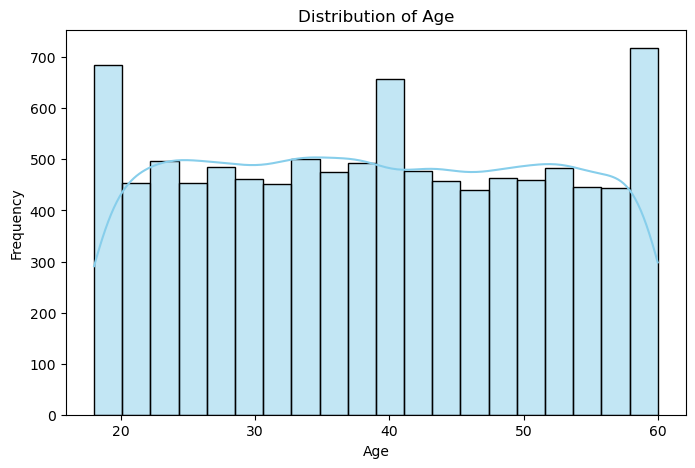

In [14]:
# for age 
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

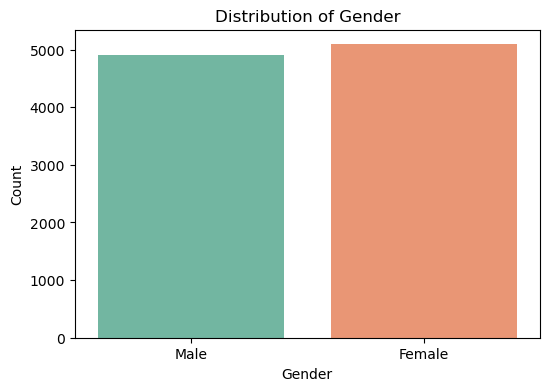

In [15]:
# for gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [16]:
df[:1]

,Name,Gender,Age,Email,Feedback,Sentiment,Rating
0,Karan2497,Male,22,karan2497@example.com,Product quality is not satisfactory.,Negative,2


In [17]:
# Encoding of categorical coulumns
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
df["Gender"] = le.fit_transform(df["Gender"]) 
df["Sentiment"] = le.fit_transform(df["Sentiment"])

In [20]:
# Convert text feedback into numerical features using TF-IDF / Bag of Words.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
tfidf= TfidfVectorizer( max_features=5000 , stop_words="english",)

# Fit & transform
X_text = tfidf.fit_transform(df["Feedback"]).toarray()


In [22]:
X_num = df[["Age", "Gender", "Rating"]].values

In [23]:
from scipy.sparse import hstack
X = np.hstack((X_text, X_num))

In [24]:
df[:5]

,Name,Gender,Age,Email,Feedback,Sentiment,Rating
0,Karan2497,1,22,karan2497@example.com,Product quality is not satisfactory.,0,2
1,Amit9437,0,41,amit9437@example.com,The staff was not very helpful.,0,1
2,Meena7736,1,32,meena7736@example.com,Product quality is not satisfactory.,0,3
3,Anjali7855,0,35,anjali7855@example.com,Good discounts and reasonable prices.,1,5
4,Rohit4126,0,60,rohit4126@example.com,Products are affordable and of great quality.,1,5


In [25]:
df = df.drop(["Name" , "Email" ], axis = 1)

### Train Test Split ###

In [26]:
# Define  y
y = df["Sentiment"].values

In [27]:
# train test split
from sklearn.model_selection import train_test_split

In [28]:
X_train , X_test , y_train, y_test = train_test_split(X, y , train_size = 0.8 , random_state = 43)

In [29]:
X_train.shape , X_test.shape

((8000, 54), (2000, 54))

## Model Building ##

### Logistic Regession ###

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(X_train , y_train)

LogisticRegression()

In [33]:
print("Train accuracy of Logistic Regression is" , lr.score(X_train , y_train)*100)

Train accuracy of Logistic Regression is 100.0


In [34]:
print("Test accuracy of Logistic Regression is" , lr.score(X_test , y_test)*100)

Test accuracy of Logistic Regression is 100.0


In [35]:
#Print accuracy, precision, recall, F1-score.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [36]:
# Predict on test data
y_pred_lr = lr.predict(X_test)

In [37]:
# ---- Metrics ----
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [38]:
# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred_lr)

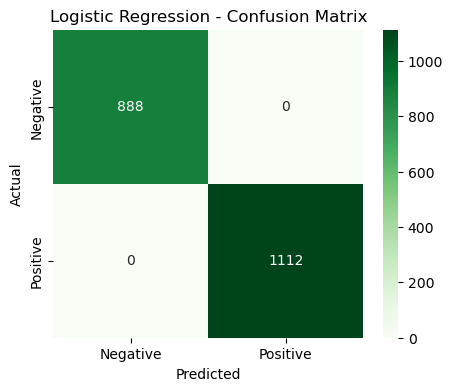

In [39]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Negative","Positive"],
            yticklabels=["Negative","Positive"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Random Forest Classifier ###

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [42]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# Predict on test data
y_pred_rf = rf.predict(X_test)

In [44]:
print("Train accuracy of Random Forest classifier is" , rf.score(X_train , y_train)*100)

Train accuracy of Random Forest classifier is 100.0


In [45]:
print("Test accuracy of print Random Forest classifier is" , rf.score(X_test , y_test)*100)

Test accuracy of print Random Forest classifier is 100.0


 Our target variable is Sentiment → it has two categories:  Positive and Negative
Since we are predicting categories (labels) and not continuous numbers, this is a classification problem, not regression.

In [46]:
#Print accuracy, precision, recall, F1-score.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [47]:
# ---- Metrics ----
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [48]:
# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred_rf)

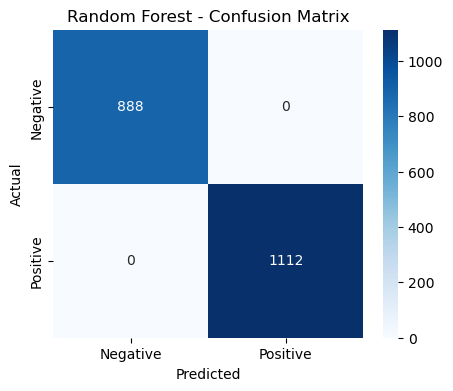

In [49]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative","Positive"],
            yticklabels=["Negative","Positive"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [51]:
import joblib
joblib.dump(rf, "random_forest_model.joblib")
joblib.dump(tfidf, "tfidf_vectorizer.joblib")

import pickle

with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)




